In [1]:
%%html
<style>

.rendered_html {
  font-size:1.5em;
}

.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 200%;
}

</style>

In [2]:
from bokeh.themes import Theme
from bokeh.io import curdoc
theme = Theme(filename="./theme.yaml")
#curdoc().theme = theme

# Interactive Visualizations with Python

### Madpy Meetup
January 9, 2020

### About Me

- Zach Griffith
- Software Developer for the Space Science and Engineering Center at UW-Madison
- zdgriffith on GitHub

## Outline

- Bokeh
    - why?
    - The Bokeh Model
    - building blocks (models, glyphs)
    - Tying visual attributes to data columns (ColumnDataSource)
    - Bokeh Server
        - callbacks
- Holoviews
- Geoviews
- Alternatives (Plotly, Altair)
- Summary
- References
- Resources

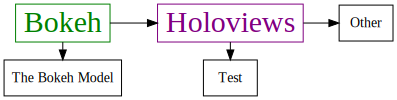

In [48]:
from graphviz import Digraph

dot = Digraph(comment='Outline')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')

with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('1', 'Bokeh', fontsize='30', color='green', fontcolor='green')
    c.node('1a', 'The Bokeh Model')
    c.edge('1', '1a')
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('2', 'Holoviews', fontsize='30', color='purple', fontcolor='purple')
    c.node('2a', 'Test')
    c.edge('2', '2a')
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('3', 'Other')
dot.edges(['12', '23'])
dot

# Why Bokeh

- Write entirely in Python - No JavaScript! <span style="font-size:small;">most of the time...</span>

- Built to work well with PyData Tools (e.g. Pandas)

- Supports variety of output formats
    - Jupyter Notebook
    - Standalone HTML
    - Web Applications via Bokeh Server

In [3]:
from bokeh.io import output_file, output_notebook

#output_file('output.html')
output_notebook()

Loading BokehJS ...

# The Bokeh Model

In [4]:
'''
from graphviz import Digraph

dot = Digraph(comment='The Bokeh Model')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')
with dot.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('A', 'Python Objects')
    c.attr(label='Bokeh')
dot.node('B', 'JSON')

with dot.subgraph(name='cluster_1') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('C', 'JavaScript Objects')
    c.attr(label='BokehJS')
dot.node('D', 'HTML/SVG Output')
dot.edges(['AB', 'BC', 'CD'])
dot.format = 'svg'
'''

"\nfrom graphviz import Digraph\n\ndot = Digraph(comment='The Bokeh Model')\ndot.attr('node', shape='rectangle')\ndot.attr(rankdir='LR')\nwith dot.subgraph(name='cluster_0') as c:\n    c.attr(style='filled', color='lightgrey')\n    c.node_attr.update(style='filled', color='white')\n    c.node('A', 'Python Objects')\n    c.attr(label='Bokeh')\ndot.node('B', 'JSON')\n\nwith dot.subgraph(name='cluster_1') as c:\n    c.attr(style='filled', color='lightgrey')\n    c.node_attr.update(style='filled', color='white')\n    c.node('C', 'JavaScript Objects')\n    c.attr(label='BokehJS')\ndot.node('D', 'HTML/SVG Output')\ndot.edges(['AB', 'BC', 'CD'])\ndot.format = 'svg'\n"

<center>
    <img src="images/bokeh_model.svg"
         align="center"
         width="100%">
</center>

In [5]:
from bokeh.models import Line
line = Line(x=1, y=2, line_color='orange', line_width=4)
line.to_json(include_defaults=False)

{'id': '1002',
 'line_color': 'orange',
 'line_width': 4,
 'x': {'value': 1},
 'y': {'value': 2}}

# Mapping Visual Attributes to Data Columns

In [6]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource({
    'x': [...], # Columns can be any sequence
    'y': [...], # (e.g. list, numpy array, pandas series...)
})

In [7]:
from bokeh.plotting import figure, show
import numpy as np

x = np.arange(0, 6*np.pi, 0.01)
source = ColumnDataSource({
    'x': x,
    'y': np.sin(x)
})

# plotting with the barebones bokeh.models API
p = figure(height=200)
line = Line(x='x', y='y')
p.add_glyph(source, line)
show(p)

In [8]:
# plotting with the convenient bokeh.plotting API
p = figure(height=200)
p.line(source=source, x='x', y='y')
show(p)

# Widgets

In [9]:
from bokeh.models.widgets import Button, CheckboxGroup, Slider

button = Button(label='Woo MadPy', button_type='success')
show(button)

In [10]:

checkbox_group = CheckboxGroup(
        labels=["Python", "JavaScript", "Stuff"], active=[0, 1])
show(checkbox_group)

In [11]:
slider = Slider(start=0, end=11, value=11, step=0.1, title='MadPy Volume')
show(slider)

In [12]:
slider.to_json(include_defaults=False)

{'callback': None,
 'end': 11,
 'id': '1250',
 'start': 0,
 'step': 0.1,
 'title': 'MadPy Volume',
 'value': 11}

# Configuring Widgets

Configureable two ways:

- Python event handlers 
    - must use bokeh serve
- JavaScript Callbacks
    - works in standalone HTML documents

# Python Event Handlers

In [13]:
def my_text_input_handler(attr, old, new):
    print("Previous label: " + old)
    print("Updated label: " + new)

slider.on_change("value", my_text_input_handler)

In [14]:
from bokeh.models.callbacks import CustomJS

callback = CustomJS(
    args=dict(xr=p.y_range),
    code="xr.start = cb_obj.value;" # models passes as args are magically available
)

# Bokeh Server

Connect front-end UI events (JavaScript) to running Python code



In [21]:
from graphviz import Digraph

dot = Digraph(comment='Bokeh Server')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')

dot.node('BS', 'Bokeh Server')
dot.node('App', 'Application')
for i in [0, 1]:
    with dot.subgraph(name=f'cluster_{i}') as c:
        c.attr(style='filled', color='lightgrey')
        c.node_attr.update(style='filled', color='white')
        c.node(f'A{i}', 'Python Objects', group=str(i))
        c.attr(label='User Session')
        c.node(f'W1{i}', 'WebSocket', shape='oval')
        c.node(f'B{i}', 'JSON', group=str(i))
        c.node(f'W2{i}', 'WebSocket', shape='oval')
        c.node(f'C{i}', 'JavaScript Objects', group=str(i))
    dot.node(f'D{i}', 'HTML Canvas/SVG Output')
    dot.edges([
        [f'A{i}', f'B{i}'],
        [f'B{i}', f'C{i}'],
        [f'C{i}', f'D{i}'],
        [f'A{i}', f'W1{i}'],
        [f'W1{i}', f'C{i}'],
    ])
    dot.edge(f'A{i}', f'W2{i}', dir='back')
    dot.edge(f'W2{i}', f'C{i}', dir='back')

dot.edge('BS', 'App')
dot.edge('App', 'A0')
dot.edge('App', 'A1')
dot.format = 'png'
dot.render()

'Digraph.gv.png'

<center>
    <img src="images/bokeh_serve.png"
         align="center"
         width="100%">
</center>